['motor-cycle', 'car', 'auto-rikshaw', 'bus']

0: 320x640 23 cars, 2 trucks, 150.1ms
Speed: 10.3ms preprocess, 150.1ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 640)
Index 7 out of range for class_list.
Index 7 out of range for class_list.


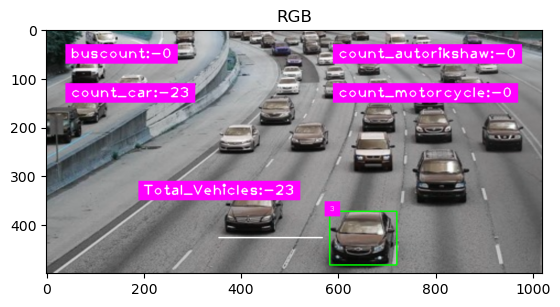

In [3]:
import math
import os

class Tracker:
    def __init__(self):
        # Store the center positions of the objects
        self.center_points = {}
        # Keep the count of the IDs
        # each time a new object id detected, the count will increase by one
        self.id_count = 0

    def update(self, objects_rect):
        # Objects boxes and ids
        objects_bbs_ids = []

        # Get center point of new object
        for rect in objects_rect:
            x, y, w, h = rect
            cx = (x + x + w) // 2
            cy = (y + y + h) // 2

            # Find out if that object was detected already
            same_object_detected = False
            for id, pt in self.center_points.items():
                dist = math.hypot(cx - pt[0], cy - pt[1])

                if dist < 35:
                    self.center_points[id] = (cx, cy)
                    objects_bbs_ids.append([x, y, w, h, id])
                    same_object_detected = True
                    break

            # New object is detected we assign the ID to that object
            if same_object_detected is False:
                self.center_points[self.id_count] = (cx, cy)
                objects_bbs_ids.append([x, y, w, h, self.id_count])
                self.id_count += 1

        # Clean the dictionary by center points to remove IDS not used anymore
        new_center_points = {}
        for obj_bb_id in objects_bbs_ids:
            _, _, _, _, object_id = obj_bb_id
            center = self.center_points[object_id]
            new_center_points[object_id] = center

        # Update dictionary with IDs not used removed
        self.center_points = new_center_points.copy()
        return objects_bbs_ids

import cv2
import matplotlib.pyplot as plt
import pandas as pd
from ultralytics import YOLO
import cvzone
import numpy as np

model = YOLO('yolov8s.pt')

def RGB(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:  
        point = [x, y]
        print(point)

# cv2.namedWindow('RGB', cv2.WINDOW_NORMAL)
# cv2.setMouseCallback('RGB', RGB)

# Define the path to the image file
image_path = 'car_images.jpg'

my_file = open("coco1.txt", "r")
data = my_file.read()
class_list = data.split("\n")
print(class_list)

cy1 = 427
offset = 6

tracker = Tracker()
tracker1 = Tracker()
tracker2 = Tracker()
tracker3 = Tracker()
bus = []
car = []
auto_rikshaw = []
motorcycle = []

# Read the image file
frame = cv2.imread(image_path)

frame = cv2.resize(frame, (1020, 500))
results = model.predict(frame)
a = results[0].boxes.data
px = pd.DataFrame(a).astype("float")

for index, row in px.iterrows():
    x1, y1, x2, y2 = int(row[0]), int(row[1]), int(row[2]), int(row[3])
    d = int(row[5])
    if 0 <= d < len(class_list):  # Check if d is within the bounds of class_list
        c = class_list[d]
        if c == 'bus':
            bus.append([x1, y1, x2, y2])
        elif c == 'car':
            car.append([x1, y1, x2, y2])
        elif c == 'auto-rikshaw':
            auto_rikshaw.append([x1, y1, x2, y2])
        elif c == 'motor-cycle':
            motorcycle.append([x1, y1, x2, y2])
    else:
        print(f"Index {d} out of range for class_list.")

bbox_idx = tracker.update(bus)
bbox1_idx = tracker1.update(car)
bbox2_idx = tracker2.update(auto_rikshaw)
bbox3_idx = tracker3.update(motorcycle)

for bbox in bbox_idx:
    x3, y3, x4, y4, id = bbox
    cx = int(x3 + x4) // 2
    cy = int(y3 + y4) // 2
    if cy1 < (cy + offset) and cy1 > (cy - offset):
        cv2.rectangle(frame, (x3, y3), (x4, y4), (0, 255, 0), 2)
        cvzone.putTextRect(frame, f'{id}', (x3, y3), 1, 1)

for bbox1 in bbox1_idx:
    x5, y5, x6, y6, id1 = bbox1
    cx2 = int(x5 + x6) // 2
    cy2 = int(y5 + y6) // 2
    if cy1 < (cy2 + offset) and cy1 > (cy2 - offset):
        cv2.rectangle(frame, (x5, y5), (x6, y6), (0, 255, 0), 2)
        cvzone.putTextRect(frame, f'{id1}', (x5, y5), 1, 1)

for bbox2 in bbox2_idx:
    x7, y7, x8, y8, id2 = bbox2
    cx3 = int(x7 + x8) // 2
    cy3 = int(y7 + y8) // 2
    if cy1 < (cy3 + offset) and cy1 > (cy3 - offset):
        cv2.rectangle(frame, (x7, y7), (x8, y8), (0, 255, 0), 2)
        cvzone.putTextRect(frame, f'{id2}', (x7, y7), 1, 1)

for bbox3 in bbox3_idx:
    x9, y9, x10, y10, id3 = bbox3
    cx4 = int(x9 + x10) // 2
    cy4 = int(y9 + y10) // 2
    if cy1 < (cy4 + offset) and cy1 > (cy4 - offset):
        cv2.rectangle(frame, (x9, y9), (x10, y10), (0, 255, 0), 2)
        cvzone.putTextRect(frame, f'{id3}', (x9, y9), 1, 1)

# Count the total number of vehicles
countbus = len(bus)
countcar = len(car)
countauto_rikshaw = len(auto_rikshaw)
countmotorcycle = len(motorcycle)
total_vehicle = countbus+countcar+countauto_rikshaw+countmotorcycle
# Display the total count of each vehicle
cvzone.putTextRect(frame, f'buscount:-{countbus}', (50, 60), 2, 2)
cvzone.putTextRect(frame, f'count_car:-{countauto_rikshaw}', (50, 140), 2, 2)
cvzone.putTextRect(frame, f'count_autorikshaw:-{countcar}', (600, 60), 2, 2)
cvzone.putTextRect(frame, f'count_motorcycle:-{countmotorcycle}', (600, 140), 2, 2)
cvzone.putTextRect(frame, f'Total_Vehicles:-{total_vehicle}', (200, 340), 2, 2)

cv2.line(frame, (355, 427), (568, 427), (255, 255, 255), 2)
plt.imshow(frame)
plt.title('RGB')
plt.show()
